In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

### Data Preparation

In [3]:
# read the data with pandas
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
column_selected = ['Make',
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg'
]

In [5]:
new_df = df[column_selected + ['MSRP']]

In [6]:
# rename column MSRP to price
new_df = new_df.rename(columns={'MSRP':'price'})

In [7]:
# transform column name make lower
new_df.columns = new_df.columns.str.replace(' ', '_').str.lower()

In [8]:
# check the columns that contains null
new_df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [9]:
# fill the missing value with 0
new_df.fillna(0, inplace=True)

In [10]:
# check again the columns that contains null
new_df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

In [11]:
new_df['transmission_type'].value_counts(ascending=False)

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

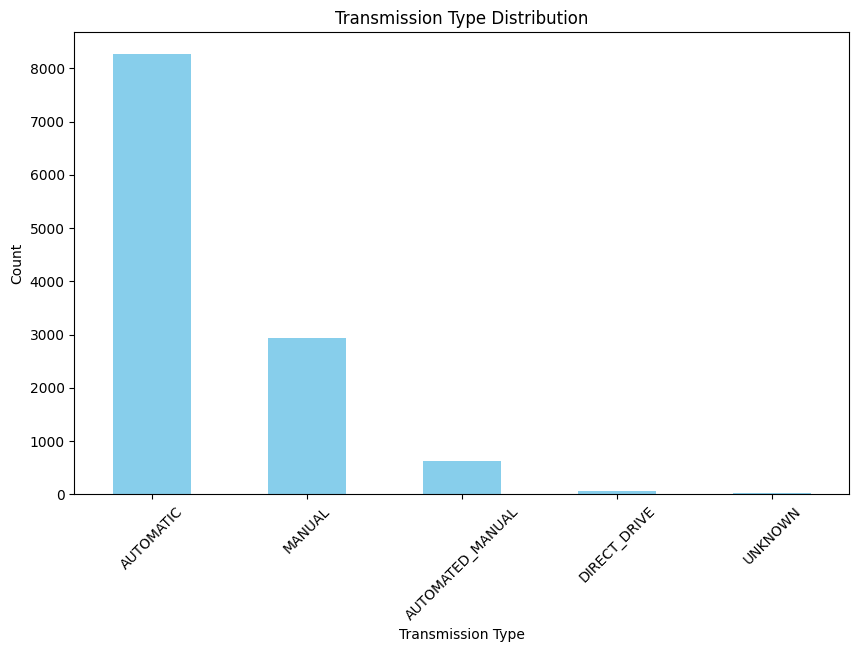

In [12]:
plt.figure(figsize=(10,6))

new_df['transmission_type'].value_counts(ascending=False).plot(kind='bar', color='skyblue')

plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Transmission Type Distribution')
plt.xticks(rotation=45)

plt.show()

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

In [13]:
# check numerical features
new_df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [42]:
new_df.columns[new_df.dtypes != 'object'].tolist()

['year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'price',
 'above_average']

In [14]:
corr_matrix = new_df[['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']].corr()

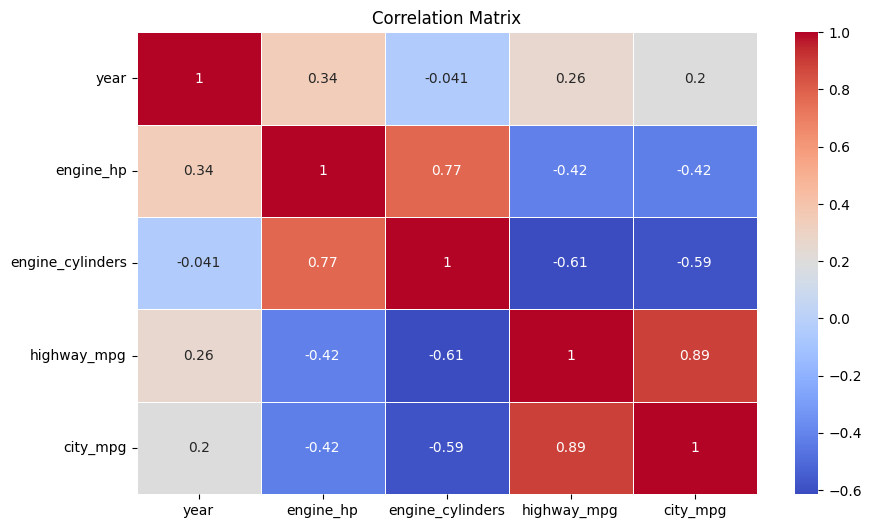

In [15]:
plt.figure(figsize=(10,6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')

plt.show()

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [16]:
new_df['above_average'] = [1 if price > new_df['price'].mean() else 0 for price in new_df['price']]

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.

In [18]:
# new_df without price column
new_df_wp = new_df.loc[:, new_df.columns != 'price']

In [19]:
df_full_train, df_test = train_test_split(new_df_wp, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [60]:
len_all = len(df_train) + len(df_val) + len(df_test)
len(df_train)/len_all, len(df_val)/len_all, len(df_test)/len_all

(0.5999664260533826, 0.2000167869733087, 0.2000167869733087)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [22]:
object_col = df_train.columns[df_train.dtypes == 'object'].tolist()
num_col = df_train.columns[df_train.dtypes != 'object'].tolist()

In [23]:
min_score = float('inf')
min_score_column = None

for i in object_col:
    score = round(mutual_info_score(df_train[i], y_train),2)
    print(f"mutual info score column `{i}` = {score}")

    if score < min_score:
        min_score = score
        min_score_column = i

print('')
print(f'Column with the lowest mutual info score: `{min_score_column}` : {min_score}')

mutual info score column `make` = 0.24
mutual info score column `model` = 0.46
mutual info score column `transmission_type` = 0.02
mutual info score column `vehicle_style` = 0.08

Column with the lowest mutual info score: `transmission_type` : 0.02


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

In [24]:
# one hot encoding
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [25]:
# fit the model on the training dataset
model = LogisticRegression(solver="liblinear", C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [26]:
# ohe and predict the val dataset
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [27]:
# accuracy model
print(f"Accuracy model : {round((y_pred == y_val).mean(),2)}")

Accuracy model : 0.95


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [28]:
# save original accuracy
ori_acc = ((y_pred == y_val).mean())

In [29]:
df_train.loc[:, df_train.columns != 'make'].head()

,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
2,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
3,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
4,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20


In [30]:
lowest_accuracy_drop = float('inf')

for c in df_train.columns:
    
    dv = DictVectorizer(sparse=False)

    train_dict = df_train.loc[:, df_train.columns != c].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver="liblinear", C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    accuracy = (y_pred == y_val).mean()

    accuracy_diff = ori_acc - accuracy

    if accuracy_diff < lowest_accuracy_drop:
        lowest_accuracy_drop = accuracy_diff
        best_column = c

    print(f"without column `{c}` get accuracy : {accuracy} , different with the original accuracy : {accuracy_diff}")

print('')
print(f'Column drop with smallest difference accuracy : {best_column} : {lowest_accuracy_drop}')

without column `make` get accuracy : 0.9467058329836341 , different with the original accuracy : -0.0016785564414603105


without column `model` get accuracy : 0.9240453210239195 , different with the original accuracy : 0.020981955518254325
without column `year` get accuracy : 0.9479647503147294 , different with the original accuracy : -0.002937473772555599
without column `engine_hp` get accuracy : 0.9278220730172052 , different with the original accuracy : 0.01720520352496857
without column `engine_cylinders` get accuracy : 0.9458665547629039 , different with the original accuracy : -0.0008392782207301552
without column `transmission_type` get accuracy : 0.9450272765421738 , different with the original accuracy : 0.0
without column `vehicle_style` get accuracy : 0.9324381032312211 , different with the original accuracy : 0.012589173310952662
without column `highway_mpg` get accuracy : 0.9467058329836341 , different with the original accuracy : -0.0016785564414603105
without column `city_mpg` get accuracy : 0.9324381032312211 , different with the original accuracy : 0.012589173310952662

Column drop with 

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [31]:
df_6 = new_df.copy()

In [32]:
df_6 = df_6.drop(columns='above_average')

In [33]:
df_6['price'] = np.log1p(df_6['price'])

In [34]:
df_full_train, df_test = train_test_split(df_6, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [35]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['price'].values
y_val = df_val['price'].values
y_test = df_test['price'].values

del df_train['price']
del df_val['price']
del df_test['price']

In [36]:
# one hot encoding
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [37]:
for alpha in [0, 0.01, 0.1, 1, 10]:
    # fit the model on the training dataset
    model = Ridge(alpha=alpha, solver='sag', random_state=42, max_iter=1000)
    model.fit(X_train, y_train)

    # ohe and predict the val dataset
    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    rmse_score = round(np.sqrt(mean_squared_error(y_val, y_pred)),3)

    print(f'RMSE for alpha {alpha} : {rmse_score}')

c:\Users\imamx\anaconda3\envs\mlzoomcamp2023\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RMSE for alpha 0 : 0.487


c:\Users\imamx\anaconda3\envs\mlzoomcamp2023\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RMSE for alpha 0.01 : 0.487


c:\Users\imamx\anaconda3\envs\mlzoomcamp2023\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RMSE for alpha 0.1 : 0.487


c:\Users\imamx\anaconda3\envs\mlzoomcamp2023\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RMSE for alpha 1 : 0.487
RMSE for alpha 10 : 0.487


c:\Users\imamx\anaconda3\envs\mlzoomcamp2023\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
